In [1]:
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt

import imagej
ij = imagej.init('/Applications/Fiji_clij.app/')
ij.getVersion()

from jnius import autoclass
CLIJx = autoclass('net.haesleinhuepf.clijx.CLIJx')
clijx = CLIJx.getInstance();

Added 400 JARs to the Java classpath.


In [2]:
sk_img = skimage.io.imread('https://samples.fiji.sc/blobs.png')
print(sk_img.shape)

(254, 256)


In [3]:
#push to java
ij_img = ij.py.to_java(sk_img)
# push to GPU
gpu_input = clijx.push(ij_img)

print(gpu_input.dimensions)

[256, 254]


The output of ```clijx.push``` and or ```ij.py.to_java``` has reversed dimensions.

In [4]:
blurred = clijx.create(gpu_input);
clijx.blur(gpu_input, blurred, 5, 5, 0);

In [5]:
blurred.getDimensions()

[256, 254]

If we are not careful and just use the dimensions of the output array, we get a distorted array:

In [6]:
def clijx_pull(buffer):
    import numpy
    numpy_image = numpy.zeros(buffer.getDimensions())
    wrapped = ij.py.to_java(numpy_image);
    clijx.pullToRAI(buffer, wrapped);
    return numpy_image


In [7]:
np_arr_result = clijx_pull(blurred);

In [8]:
np_arr_result.shape

(256, 254)

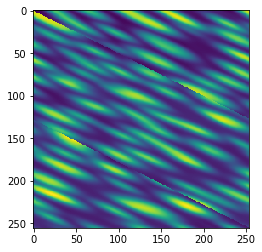

In [9]:
plt.imshow(np_arr_result)
plt.show()

If we switch the dimenions, everything works.

In [10]:
def clijx_pull(buffer):
    import numpy
    numpy_image = numpy.zeros([buffer.getDimensions()[1],buffer.getDimensions()[0]])
    wrapped = ij.py.to_java(numpy_image);
    clijx.pullToRAI(buffer, wrapped);
    return numpy_image

In [11]:
np_arr_result = clijx_pull(blurred);

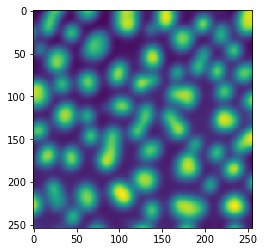

In [12]:
plt.imshow(np_arr_result)
plt.show()

The same is true in 3D. All the dimensions are reverted.

In [13]:
my3D_data = np.zeros((10,20,30), dtype =np.uint8)
ij_img = ij.py.to_java(my3D_data)
gpu_input = clijx.push(ij_img)
print('Original array dimnensions:')
print(my3D_data.shape)
print('GPU array dimnensions:')
print(gpu_input.dimensions)

Original array dimnensions:
(10, 20, 30)
GPU array dimnensions:
[30, 20, 10]
